In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split

# Read Dataset

In [39]:
df = pd.read_csv('Breast_Cancer_Wisconsin_(Diagnostic)_Data_Set.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
# Dropping unwanted columns id and Unnamed
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [8]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

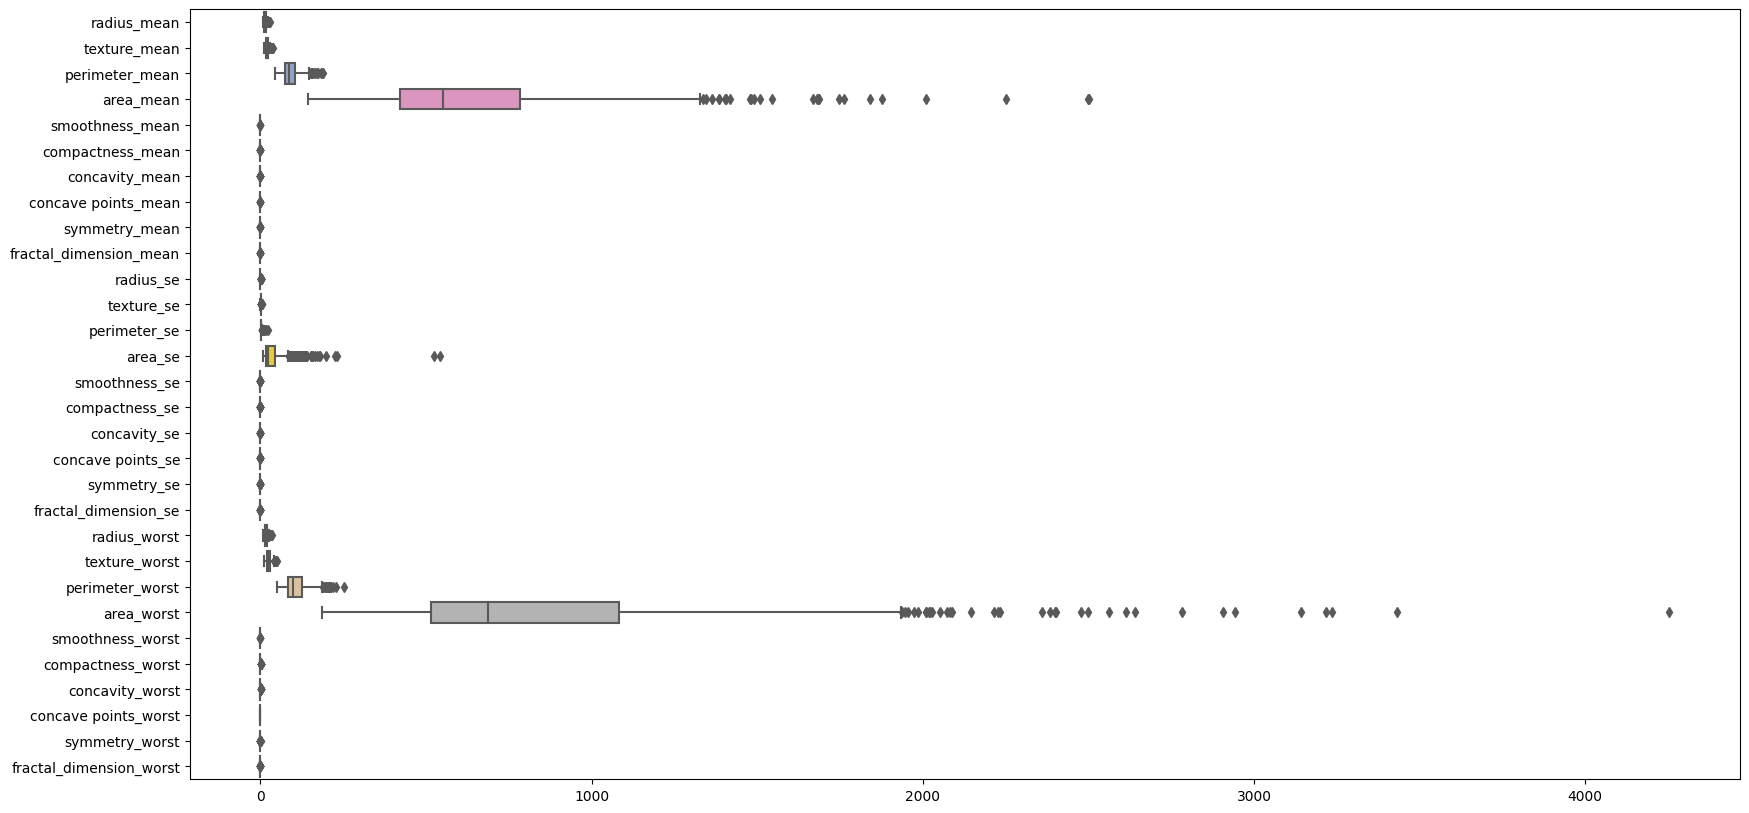

In [12]:
# checking for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=X, orient='h', palette='Set2')
plt.show()

In [41]:
# distributing the to classes into to data sets  to plot sapereatl
df_m = df[df['diagnosis'] == 'M']
df_b = df[df['diagnosis'] == 'B']

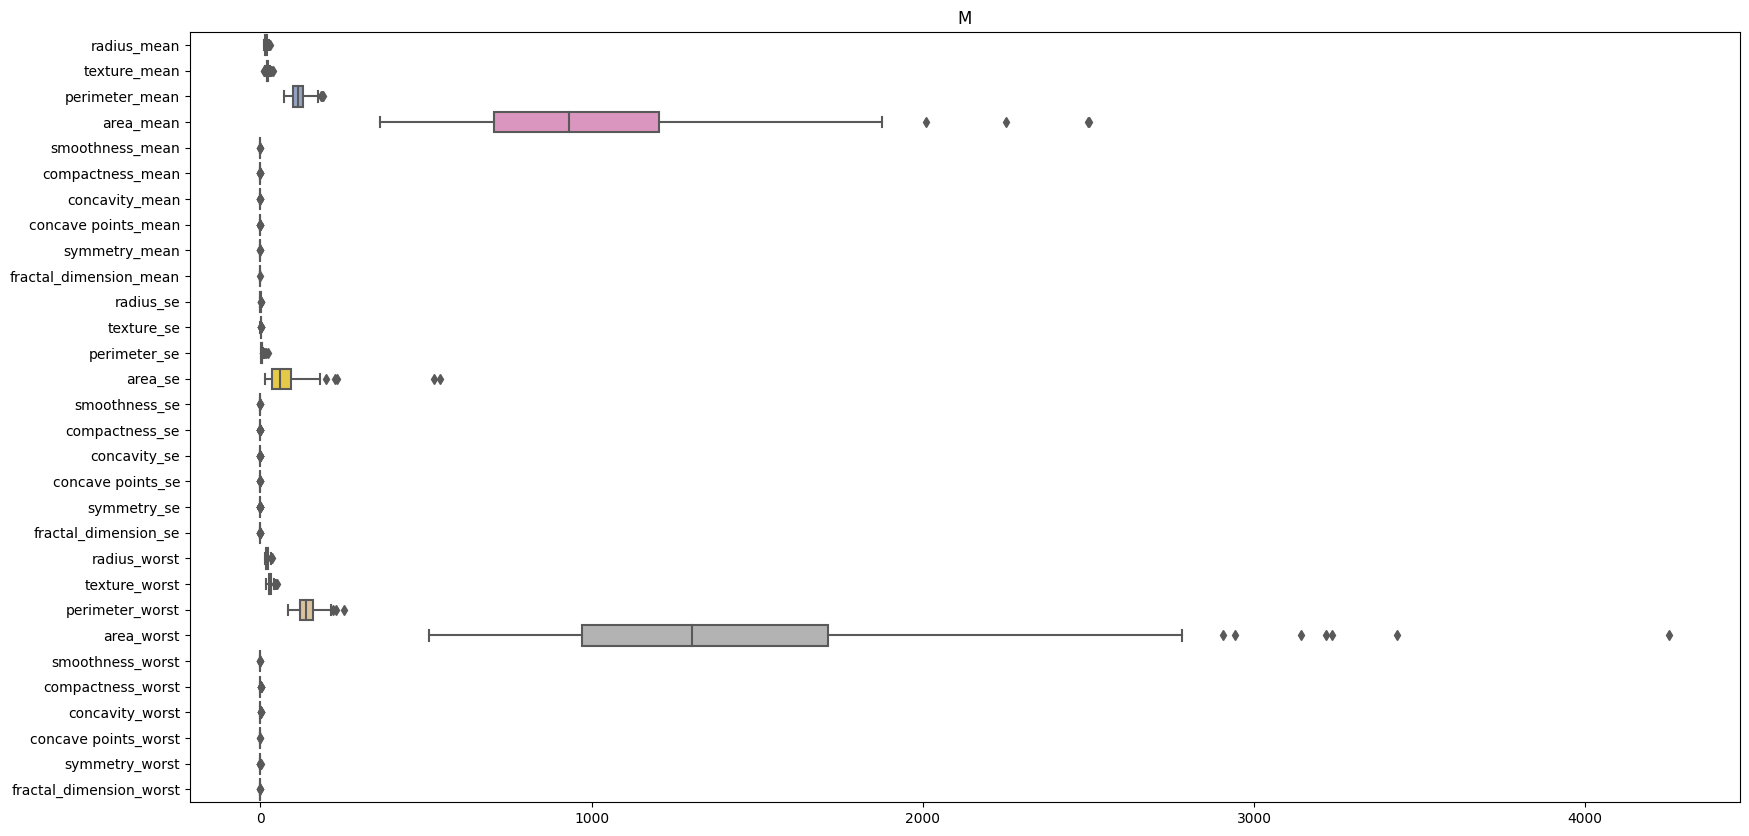

In [16]:
# checking for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_m, orient='h', palette='Set2')
plt.title('M')
plt.show()

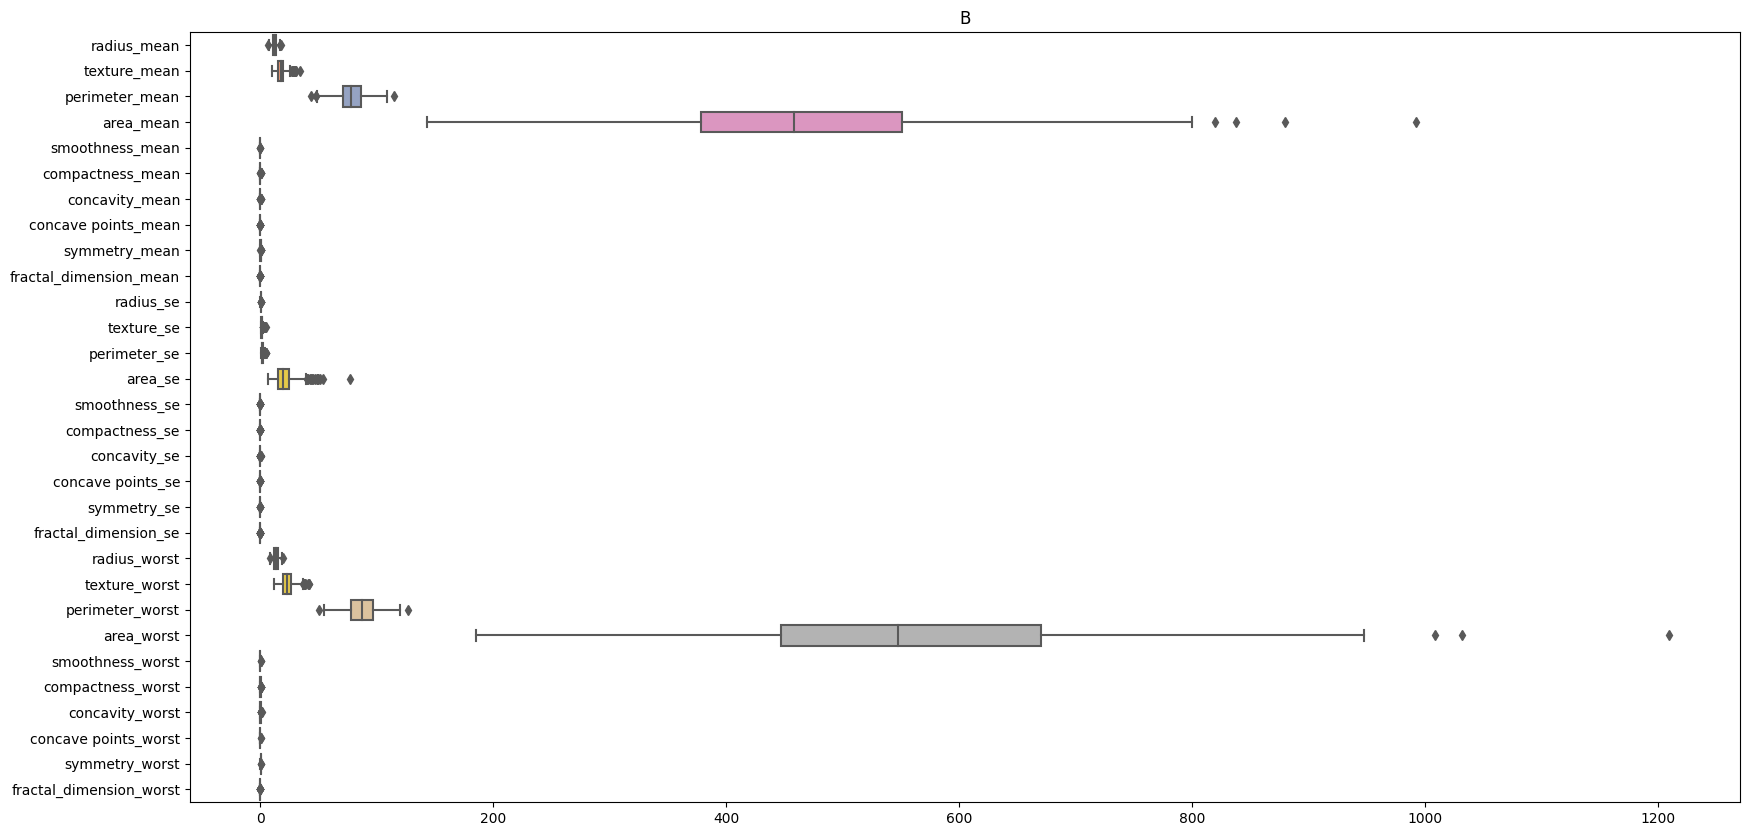

In [17]:
# checking for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_b, orient='h', palette='Set2')
plt.title('B')
plt.show()
#we will not remove any outliers because, there are called the true out liers or Extreem Values for this type of serious data of health

<AxesSubplot: >

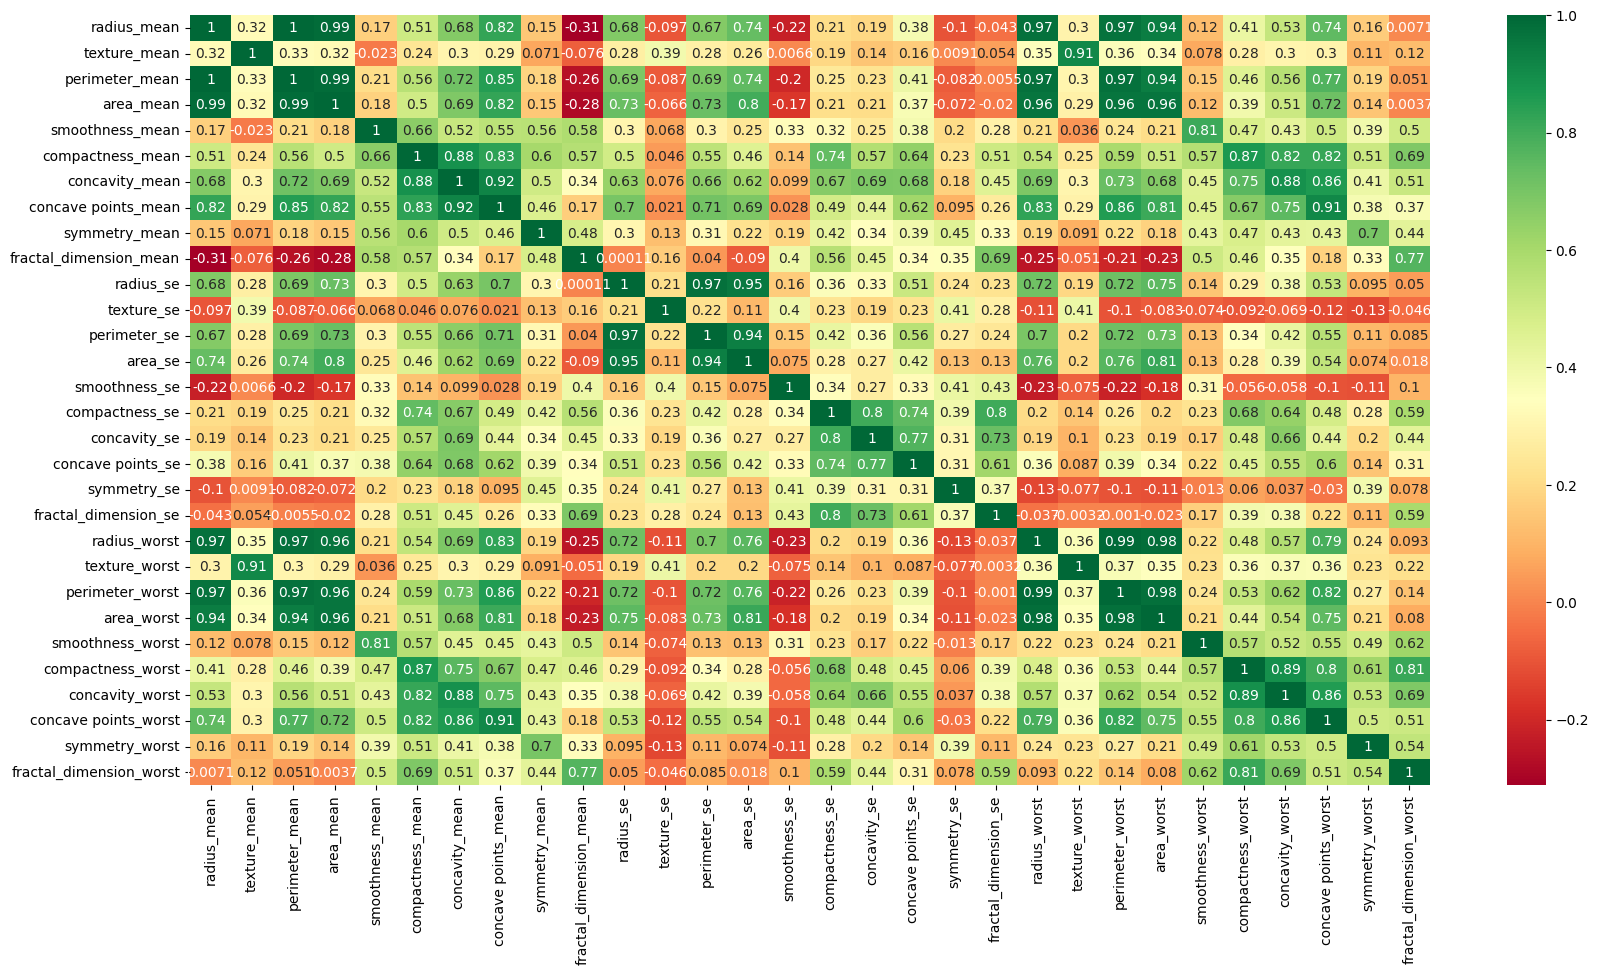

In [29]:
# checking corrolation
corr_X = X.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_X, annot=True, cmap='RdYlGn')

In [30]:
sns.pairplot(corr_X)

In [ ]:
# importing a image of flow chart of data augmentation
from IPython.display import Image
Image(filename='dsfsfsdfs.png')

# Data Augmentation

In [42]:
# one hot encoding hte m = 1 and B = 0
# df['diagnosis'] = df['diagnosis'].map({'M':1 , 'B': 0})

#replace by M by 1
df_m['diagnosis'].replace('M', 1, inplace=True)
# replce B by 0
df_b['diagnosis'].replace('B', 0, inplace=True)

In [43]:
df_b.columns

19     0
20     0
21     0
37     0
46     0
      ..
558    0
559    0
560    0
561    0
568    0
Name: diagnosis, Length: 357, dtype: int64